# DATA PREPARATION

Task 1 : 

Examine transaction data and customer data(Perform data preprcessing and EDA)

Data analysis and customer segments – 

look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find.


Deep dive into customer segments – 

define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.

##### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

#### Analysis on Customer Data

In [2]:
cust_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
cust_df.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [4]:
cust_df.shape

(72637, 3)

In [5]:
cust_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
cust_df.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [8]:
cust_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [9]:
cust_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

### Checking for duplicate values

In [10]:
cust_df.duplicated().sum()

0

### Checking for missing values

In [11]:
cust_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Preforming graphical analysis

<AxesSubplot:title={'center':'Customers from differnet lifestages'}, xlabel='LIFESTAGE', ylabel='count'>

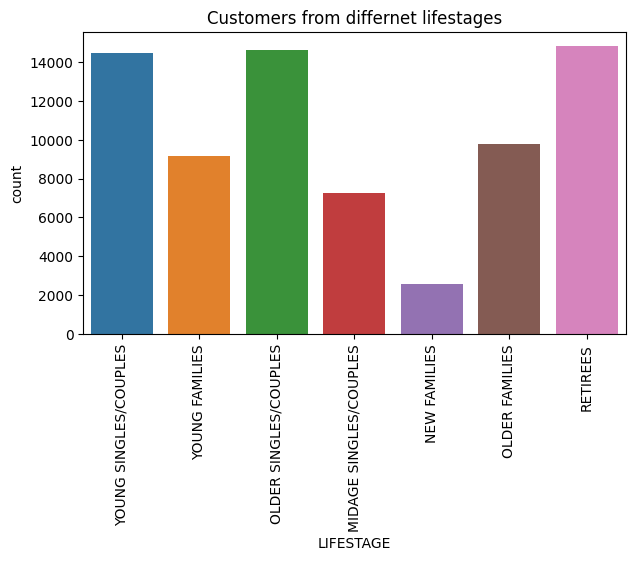

In [12]:
plt.figure(figsize=(7,4),dpi = 100)
plt.xticks(rotation = 90)
plt.ylabel('Number of Customers')
plt.title('Customers from differnet lifestages')
sea.countplot(x = 'LIFESTAGE', data = cust_df)

Most of the customers are YOUNG SINGLES/COUPLES, OLDER SINGLES/COUPLES and RETIREES

In [13]:
cust_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Number of Customers')

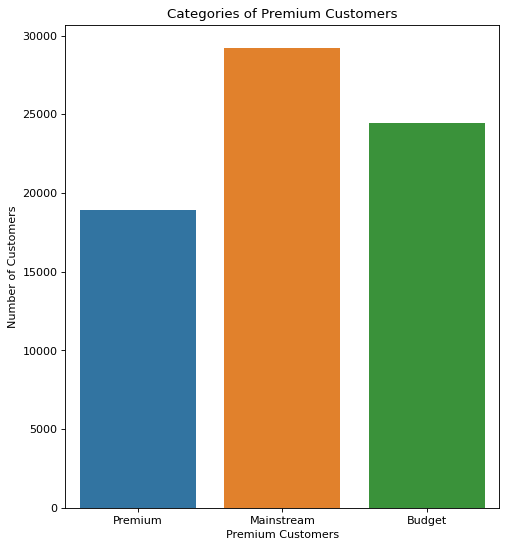

In [14]:
plt.figure(figsize=(7,8), dpi= 80)
sea.countplot(x = 'PREMIUM_CUSTOMER', data = cust_df)
plt.title('Categories of Premium Customers')
plt.xlabel('Premium Customers')
plt.ylabel('Number of Customers')

### SECOND DATASET (Transaction Data)

In [15]:
tran_df = pd.read_excel('QVI_transaction_data.xlsx')

In [16]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [17]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [18]:
# Dates
import datetime
from matplotlib.dates import DateFormatter


In [19]:
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [20]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [21]:
#Function to change date format

# Function that converts Excel integer into yyyy-mm-dd format
def xldate_to_date(properdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(properdate < 60):
        delta_in_days = datetime.timedelta(days = (properdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (properdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date
    

In [22]:
tran_df['DATE'] = tran_df['DATE'].apply(xldate_to_date)

In [23]:
tran_df.tail(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [24]:
tran_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [25]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [26]:
tran_df.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [27]:
tran_df.duplicated().sum()

1

In [28]:
tran_df.drop_duplicates(inplace=True)

In [29]:
tran_df.duplicated().sum()

0

In [30]:
tran_df['STORE_NBR'].value_counts().head()

226    2022
88     1873
93     1832
165    1819
237    1785
Name: STORE_NBR, dtype: int64

<AxesSubplot:title={'center':'Total sale with respect to stores'}, xlabel='STORE_NBR', ylabel='TOT_SALES'>

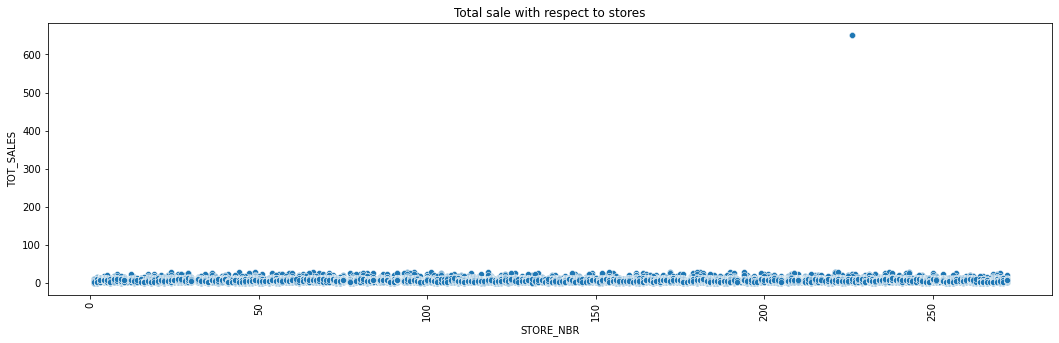

In [31]:
plt.figure(figsize=(18,5))
plt.xticks(rotation = 90)
plt.title('Total sale with respect to stores')
sea.scatterplot(x='STORE_NBR', y = 'TOT_SALES' ,data= tran_df, x_bins=100)

From above graph we can see there is one outlier having total sale near to 600

In [32]:
tran_df['PROD_QTY'].value_counts()

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

Someone has brought 200 quantities, we need to check this customer 

In [33]:
tran_df.loc[tran_df['PROD_QTY'] == 200 , :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


lets check if this customer has made any other pucrchases

In [34]:
tran_df.loc[tran_df['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


customer with loyalty car number 226000 has made only a one time purchase so we can drop this entry 

In [35]:
tran_df.drop(tran_df.index[tran_df['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [36]:
plt.figure(figsize=(100,20), dpi = 200)
plt.xticks(rotation = 90)
plt.grid('whitegrey')
plt.xlabel('Store Number')
plt.ylabel('Total sales')
plt.title('Total Sales made by every store')
sea.countplot(x='STORE_NBR' ,data= tran_df)

<AxesSubplot:title={'center':'Total Sales made by every store'}, xlabel='STORE_NBR', ylabel='count'>

<AxesSubplot:xlabel='STORE_NBR', ylabel='LYLTY_CARD_NBR'>

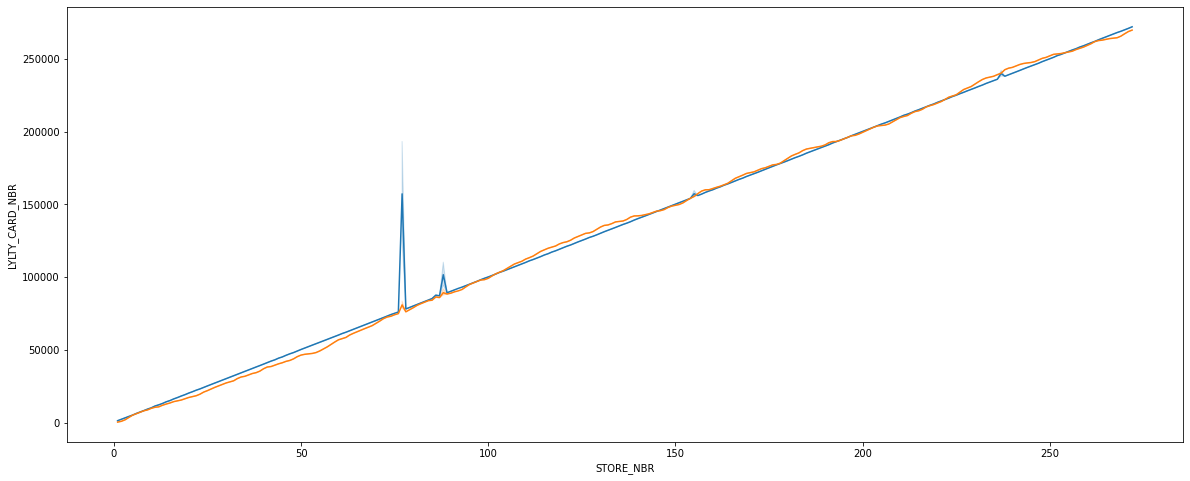

In [37]:
plt.figure( figsize= (20,8))
sea.lineplot(x = 'STORE_NBR', y = 'LYLTY_CARD_NBR' ,data = tran_df)
sea.lineplot(x = 'STORE_NBR', y = 'TXN_ID' ,data = tran_df)

From above graphs we can observe :
1. Most of sales were made bt store number 40,43,88,93,165,237,226 ,they have more than 1750 sales.
2. Avegrage most stores make more than 500 sales.

<AxesSubplot:xlabel='PROD_NAME', ylabel='count'>

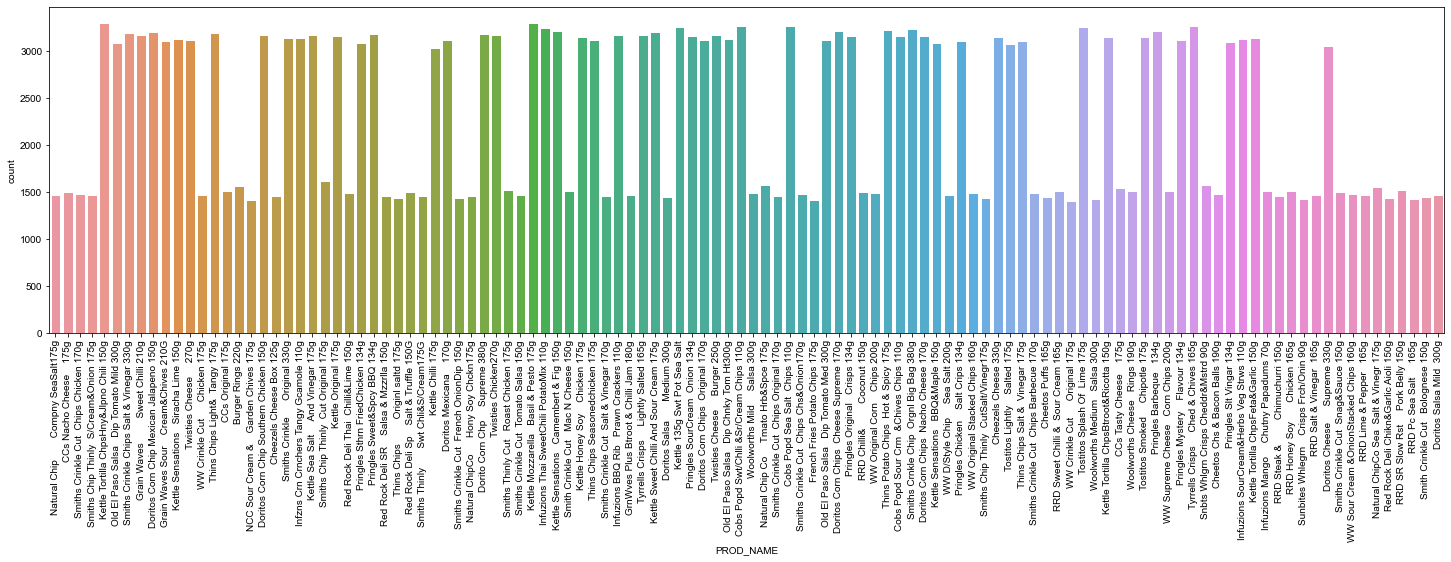

In [38]:
plt.figure(figsize=(25,6))
plt.xticks(rotation = 90)
sea.set_theme(style="white")
sea.countplot(x='PROD_NAME' ,data= tran_df)

<AxesSubplot:xlabel='PROD_QTY', ylabel='count'>

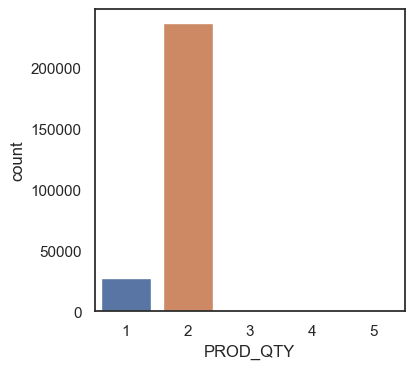

In [39]:
plt.figure(figsize=(4,4), dpi =100)
sea.countplot(x='PROD_QTY', data= tran_df)

In [40]:
tran_df['DATE'].nunique()
# Here one date is missing

364

In [41]:
# lets see which date is missing
tran_df['DATE'].describe()

/var/folders/t2/rmz95mmx5d1g6v9gz0g74x7r0000gn/T/ipykernel_751/364009672.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tran_df['DATE'].describe()


count                  264833
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [42]:
pd.date_range(start = '2018-07-01' , end = '2019-06-30').difference(tran_df['DATE'])
# missing date is christmas

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

<AxesSubplot:xlabel='DATE', ylabel='TOT_SALES'>

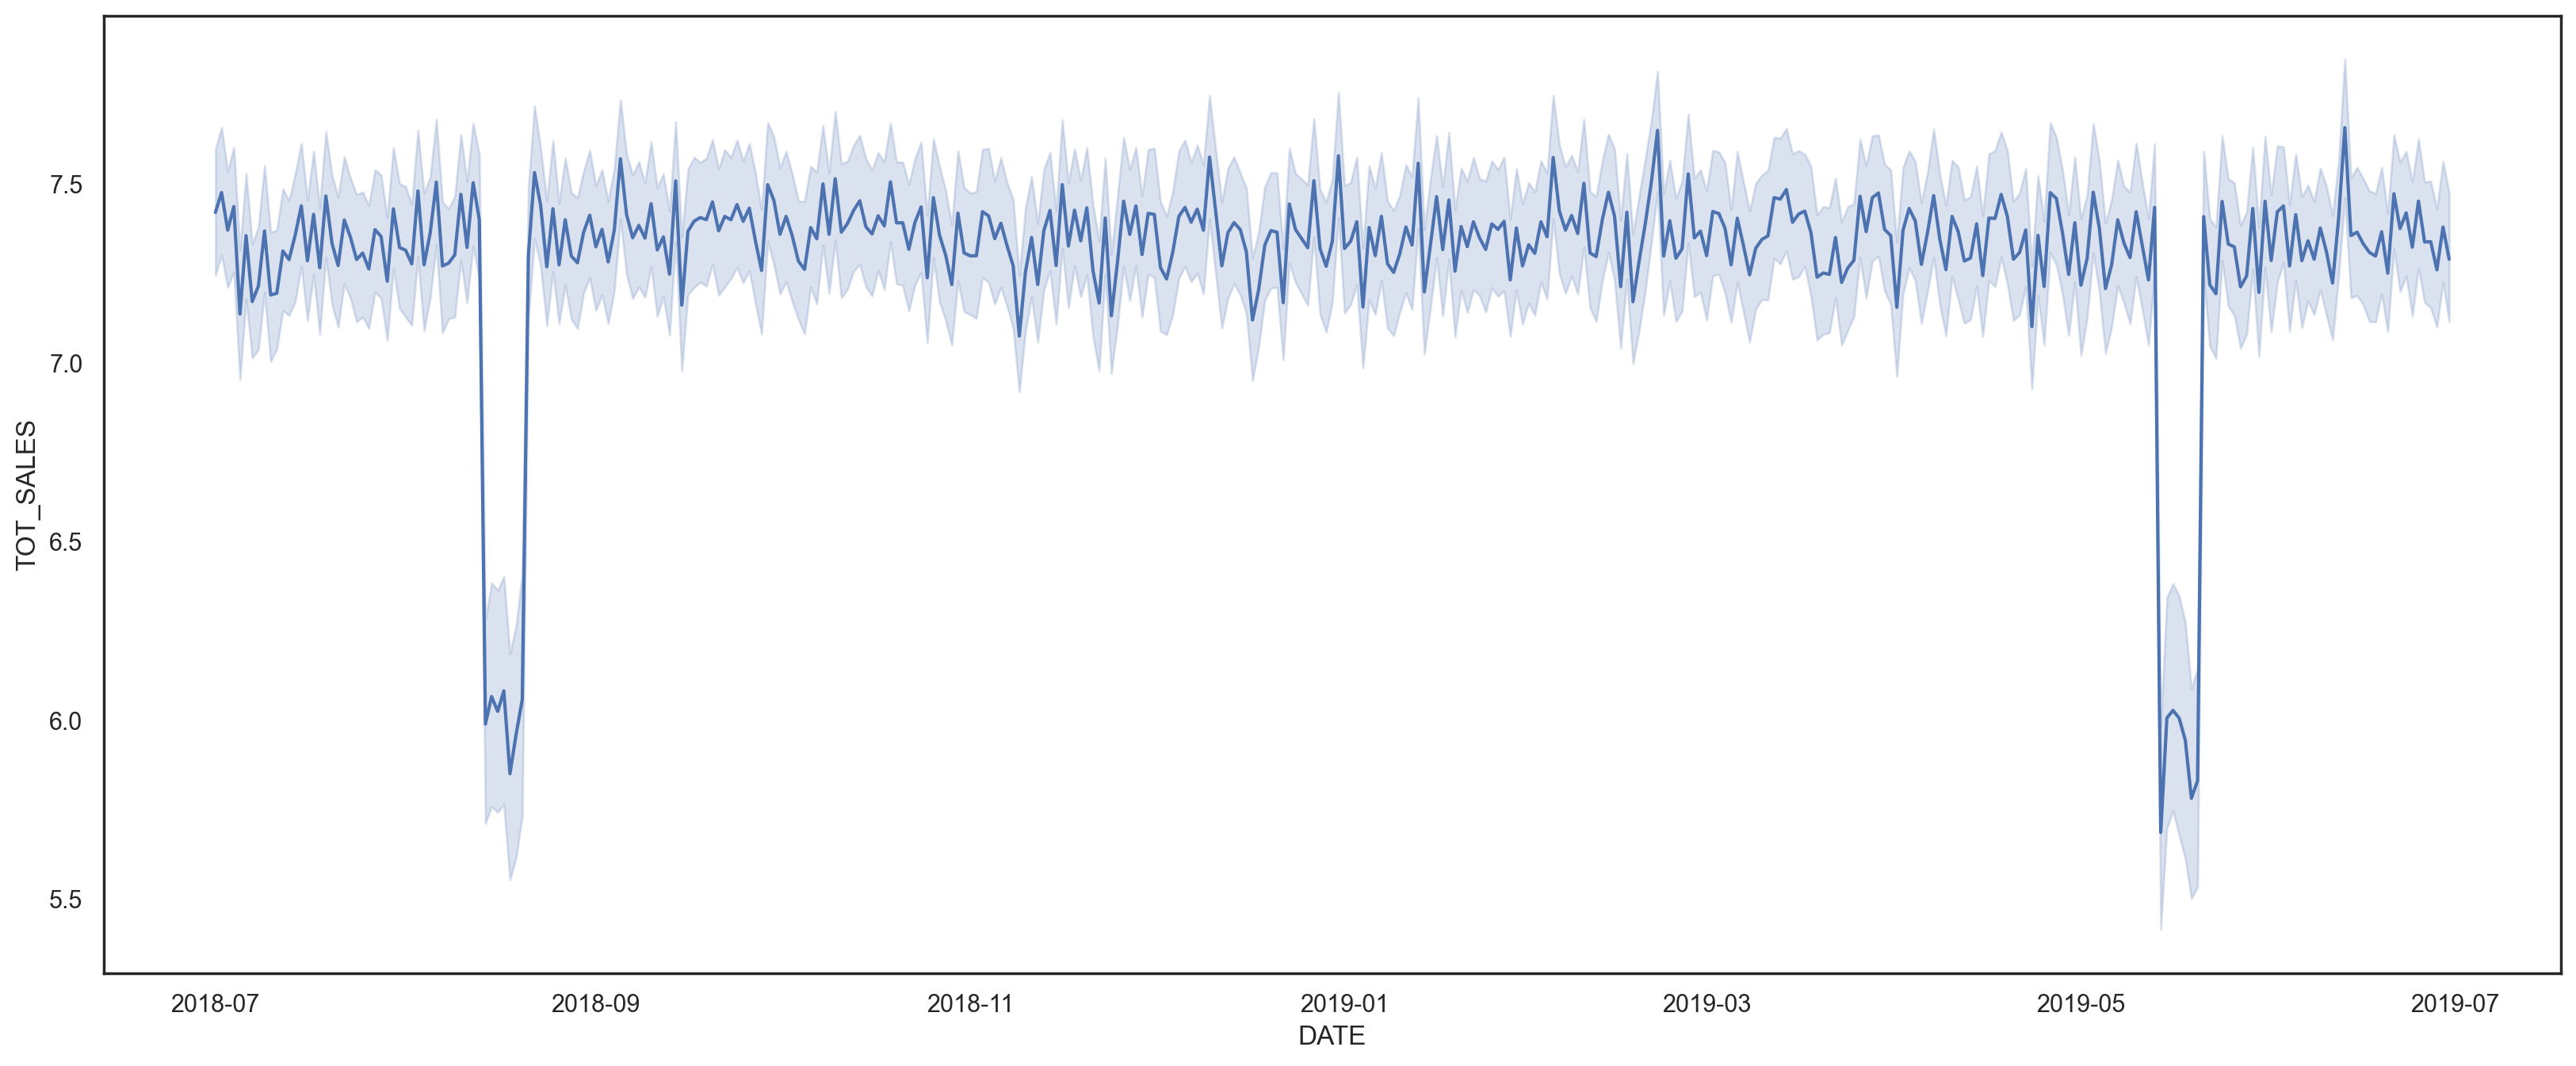

In [43]:
plt.figure( figsize= (20,8), dpi = 200)
sea.lineplot(x = 'DATE', y = 'TOT_SALES' ,data = tran_df)

# MERGE DATA

In [44]:
merge_df = pd.merge(tran_df, cust_df)

In [45]:
merge_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [46]:
merge_df.shape

(264833, 10)

In [47]:
merge_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
std,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [48]:
merge_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [49]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [50]:

sales = pd.DataFrame(merge_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132257.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             80658.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

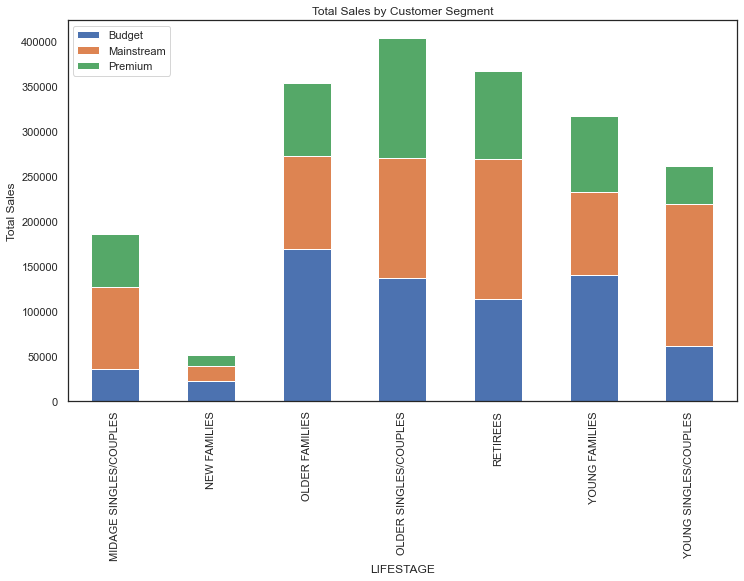

In [51]:
salesPlot = pd.DataFrame(merge_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [52]:
num_of_customers = pd.DataFrame(merge_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
num_of_customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
num_of_customers.sort_values(by = 'Number of Customers', ascending = False).head(10)


Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

#### Check for pack size

In [53]:
tran_df['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [54]:
tran_df['PACK_SIZE'] = tran_df['PROD_NAME'].str.extract("(\d+)")
tran_df['PACK_SIZE'] = pd.to_numeric(tran_df['PACK_SIZE'])
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [55]:
tran_df['PACK_SIZE'].nunique()

21

Text(0.5, 1.0, 'Different Pack Size')

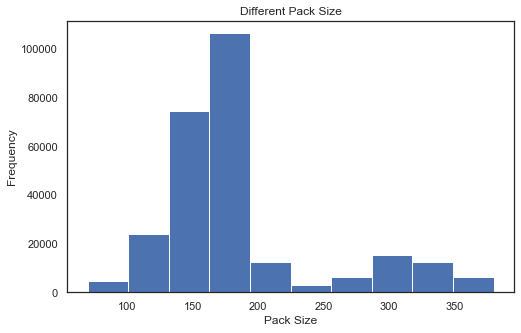

In [56]:
plt.figure(figsize=(8,5))
plt.hist(tran_df['PACK_SIZE'])
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Different Pack Size')

In [57]:
seperate = tran_df['PROD_NAME'].str.partition()
tran_df['BRANDS'] = seperate[0]
tran_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRANDS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [58]:
tran_df['BRANDS'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [59]:
tran_df.groupby('BRANDS').TOT_SALES.sum().sort_values(ascending = False)

BRANDS
Kettle        390239.8
Smiths        210070.8
Doritos       201538.9
Pringles      177655.5
Old            90785.1
Thins          88852.5
Twisties       81522.1
Tostitos       79789.6
Infuzions      76247.6
Cobs           70569.8
RRD            64954.5
Tyrrells       51647.4
Grain          43048.8
Cheezels       40029.9
Dorito         39052.0
WW             35889.5
Natural        34272.0
Red            30091.5
Infzns         22800.0
CCs            18078.9
Cheetos        16884.5
Smith          14583.4
Woolworths     13454.1
GrnWves         8568.4
NCC             8046.0
French          7929.0
Burger          6831.0
Snbts           5076.2
Sunbites        4600.2
Name: TOT_SALES, dtype: float64

# CONCLUSION

### 1. Most of the customers are YOUNG(SINGLES/COUPLES), OLDER(SINGLE/COUPLES) and RETIREES.
### 2. From premium coustomers , mainstream (YOUNG(SINGLES/COUPLES)) makes more purchases.
### 3. Most of sales are made by store number 40,43,88,93,165,237,266 , each of these stores made over 1750 sales.
### 4. Most of the customers by two quantities at a time.
### 5. Chilli,salsa,chips,vinegar products have higgher sales.
### 6. Kettle,Smiths,Doritos and Pringles are the most purchased chips brands.
